In [2]:
# read features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from read_json import as_json, plot_histogram
import numpy as np

In [40]:
## merge all resampled data from all servers
develop = pd.read_csv("resampled/develop_resampled.csv"         , index_col=0)
produccion = pd.read_csv("resampled/preproduccion_resampled.csv", index_col=0)
preproduccion = pd.read_csv("resampled/produccion_resampled.csv", index_col=0)
pruebas = pd.read_csv("resampled/pruebas_resampled.csv"         , index_col=0)
qaserver = pd.read_csv("resampled/qaserver_resampled.csv"       , index_col=0)

develop["host"] = "DEVELOP"
produccion["host"] = "PRODUCCION"
preproduccion["host"] = "PREPRODUCCION"
pruebas["host"] = "PRUEBAS"
qaserver["host"] = "QASERVER"

data_full = pd.concat([develop,produccion,preproduccion,pruebas,qaserver])
data_full.sort_index(inplace=True)
data_full.columns
data_full.to_csv("resampled/data_resampled.csv")



[Text(0.5, 1.0, 'CPU')]

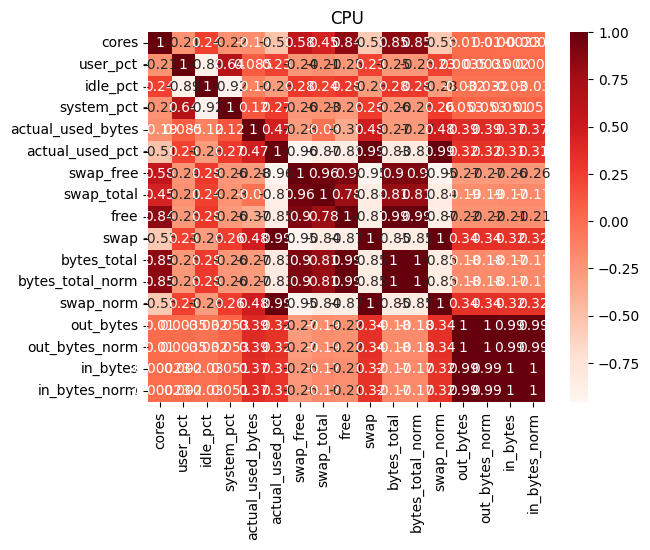

In [4]:
#df.loc[:, df.columns!='column1']
#plt.matshow(data_full.loc[:,data_full.columns!="host"].corr(), )
sb.heatmap(data_full.loc[:,data_full.columns!="host"].corr(), cmap="Reds", annot=True).set(title='CPU')

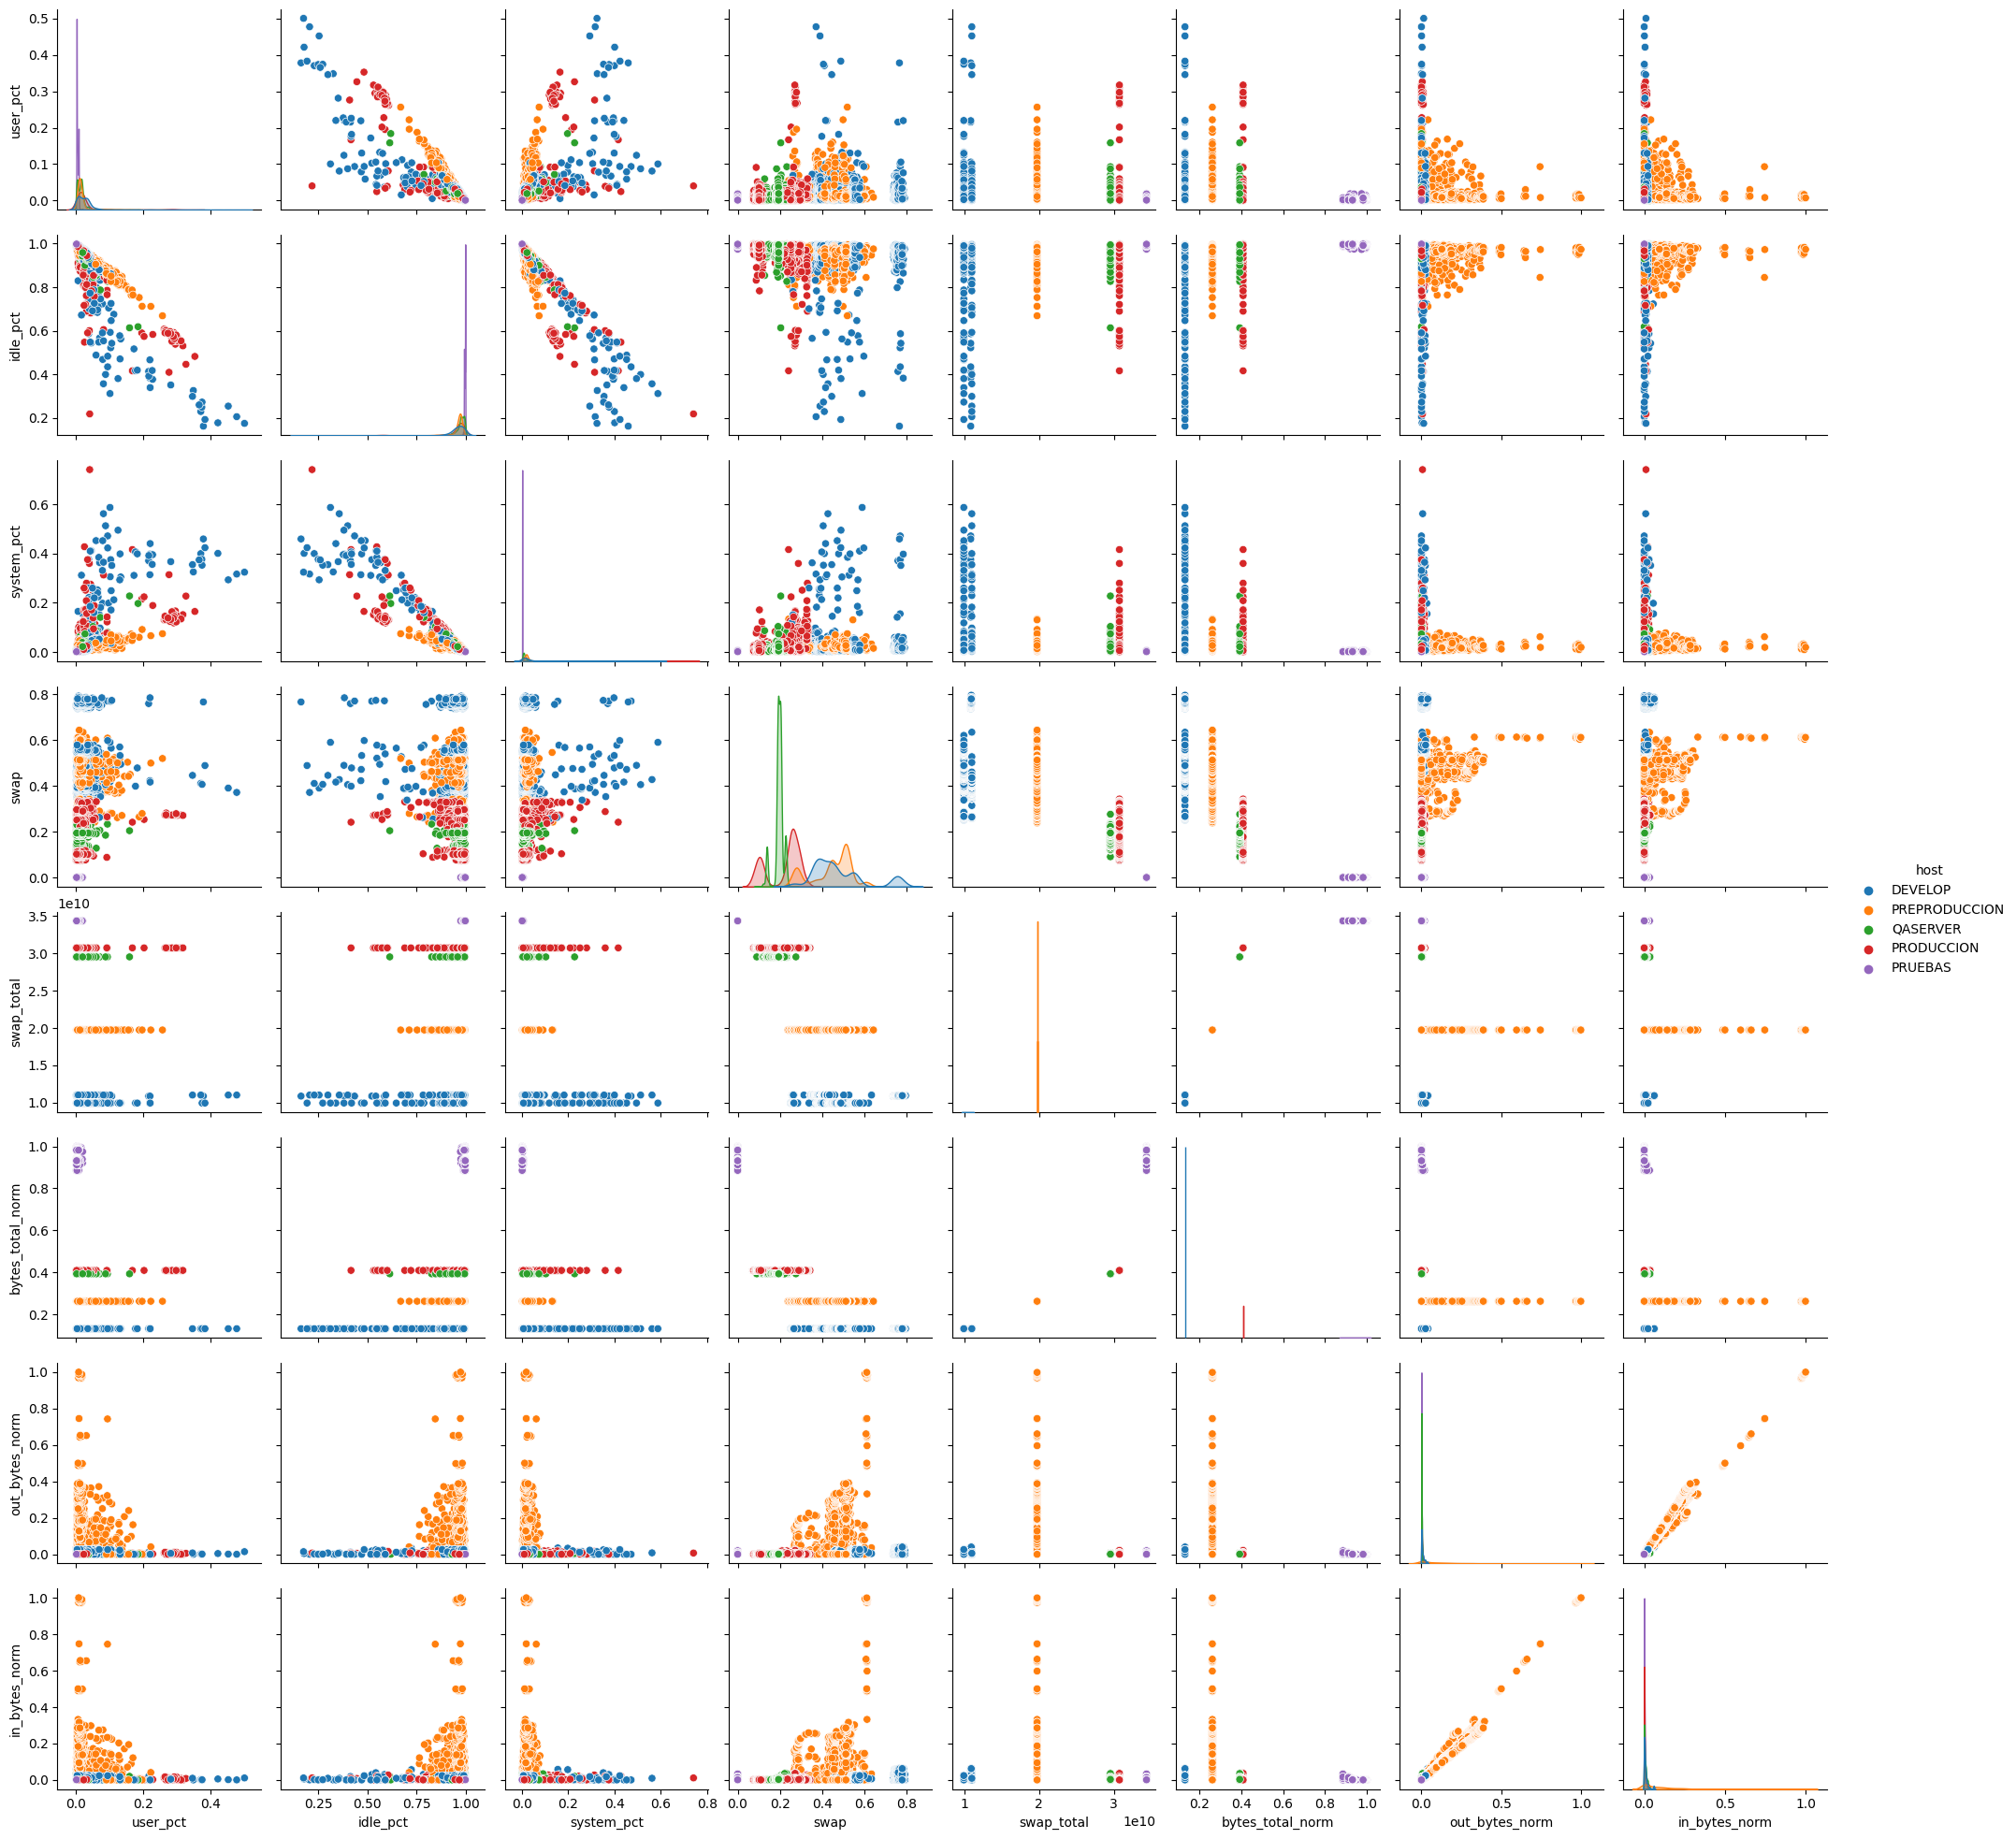

In [51]:
df_c = data_full.loc[:,["user_pct","idle_pct", "system_pct", "swap", "swap_total", "bytes_total_norm", "out_bytes_norm", "in_bytes_norm", "host"]].reset_index()  # no nos interesa el tiempo ahorita
sb.pairplot(df_c, hue="host")

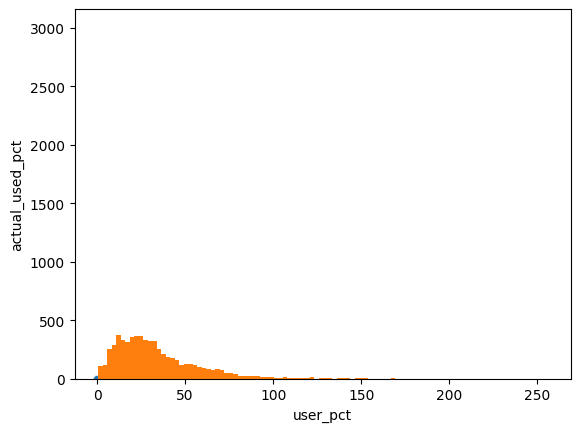

In [6]:
mem_cpu = np.array(data_full.actual_used_pct/data_full.user_pct)
mem_cpu_system = np.array(data_full.actual_used_pct/data_full.system_pct)
plt.hist(mem_cpu[~np.isnan(mem_cpu) * ~np.isinf(mem_cpu)], bins =100 );
plt.hist(mem_cpu_system[~np.isnan(mem_cpu_system) * ~np.isinf(mem_cpu_system)], bins =100 );
